In [8]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

In [9]:
sns.set(rc={'figure.figsize':(12,12)})

In [3]:
df = pd.read_csv('/Users/ruslanhuretski/Documents/karpov.cources/Statistics/experiment_lesson_4.csv')

In [4]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [5]:
df.shape

(20196, 4)

In [6]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [7]:
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [45]:
df_test = df.query('experiment_group == "test"')
df_control = df.query('experiment_group == "control"')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time'>

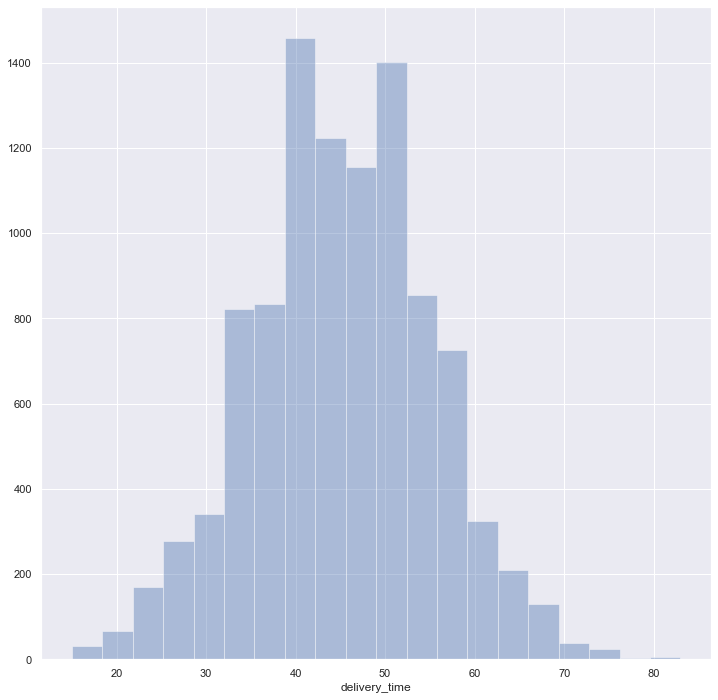

In [46]:
sns.distplot(df_control.delivery_time, kde=False, bins=20)

<AxesSubplot:xlabel='delivery_time'>

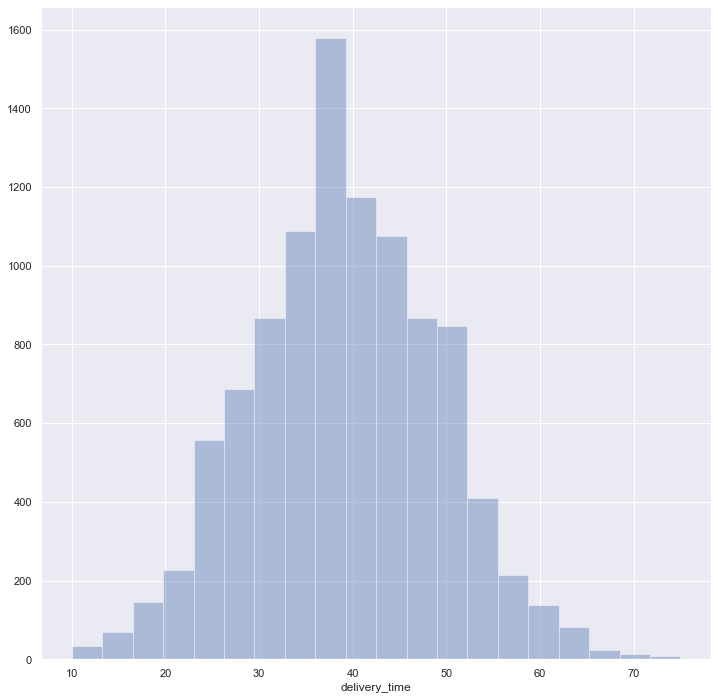

In [47]:
sns.distplot(df_test.delivery_time, kde=False, bins=20)

In [ ]:
# Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте 
# и контроле?

In [17]:
df.experiment_group.value_counts()

test       10104
control    10092
Name: experiment_group, dtype: int64

In [29]:
a = df_test.shape[0]
b = df_control.shape[0]

In [30]:
c = abs(a - b)

In [31]:
c

12

In [ ]:
# Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте 
# и в контроле.

In [23]:
df[df['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)

17877    37.0
18499    39.0
16476    48.0
14602    30.0
16719    25.0
         ... 
12410    40.0
18882    47.0
15944    47.0
14618    41.0
18816    36.0
Name: delivery_time, Length: 1000, dtype: float64

In [2]:
stats.shapiro(df_test.delivery_time.sample(1000, random_state=17))

NameError: name 'stats' is not defined

In [1]:
stats.shapiro(df_control.delivery_time.sample(1000, random_state=17))

NameError: name 'stats' is not defined

In [40]:
test_std = round(df_test.delivery_time.std(), 2)

In [41]:
control_std = round(df_control.delivery_time.std(), 2)

In [42]:
test_std

9.88

In [43]:
control_std

9.99

<AxesSubplot:xlabel='delivery_time'>

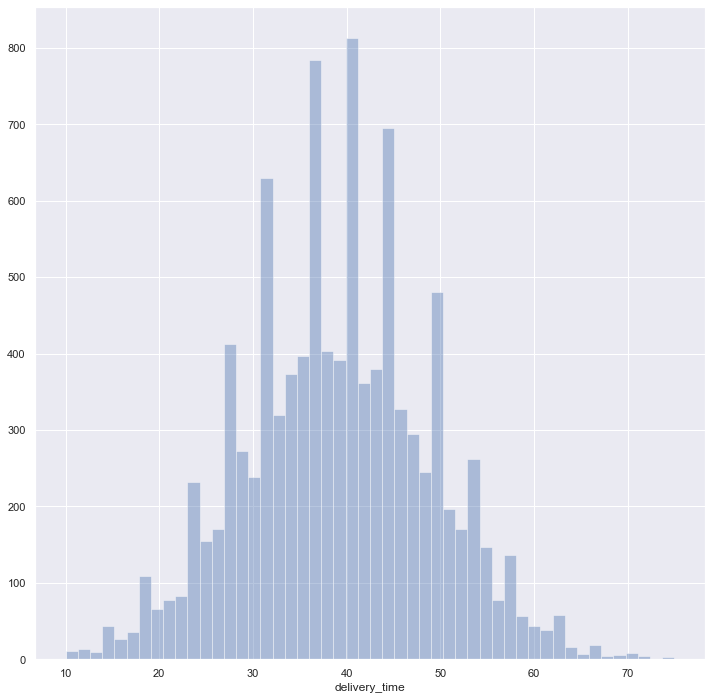

In [49]:
sns.distplot(df_test.delivery_time, kde = False)

<AxesSubplot:xlabel='delivery_time'>

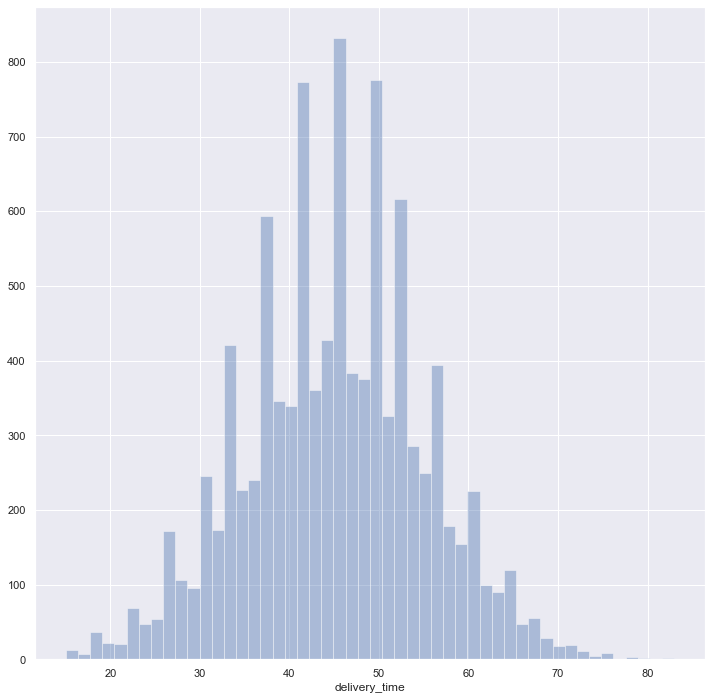

In [50]:
sns.distplot(df_control.delivery_time, kde = False)

In [ ]:
# Пришло время сравнить средние в тесте и контроле. Внимание: здесь уже не нужно пользоваться методом .sample() - он нам нужен был 
# только для теста Шапиро-Уилка, остальные тесты надо проводить на полных данных.

In [51]:
stats.ttest_ind(df_test.delivery_time, df_control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [ ]:
# На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

In [52]:
df_test.delivery_time.mean()

39.04681314330958

In [53]:
df_control.delivery_time.mean()

45.065101070154576

In [54]:
((df_test.delivery_time.mean() - df_control.delivery_time.mean()) / df_control.delivery_time.mean()) * 100

-13.354653121660812